## Fitting the (modified) Abbott method to REACT-1 data

This Jupyter notebook demonstrates the fitting of the (modified) Abbott method to REACT-1 data.

### Load the data

We start by loading the data. We use REACt-1 study rounds 14-to-19 for now.

In [1]:
library(tidyverse)
setwd("..")
START_ROUND = 14
END_ROUND = 19
df  = read.csv("data/reactdata.csv") %>%
    filter(round >= START_ROUND & round <= END_ROUND) %>%
    select(round, date, nSamples, nPos) %>%
    mutate(date=as.Date(date)) %>%
    arrange(date)
head(df)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,round,date,nSamples,nPos
,<int>,<date>,<int>,<int>
1,14,2021-09-09,1559,12
2,14,2021-09-10,2233,25
3,14,2021-09-11,2049,15
4,14,2021-09-12,2864,21
5,14,2021-09-13,6781,44
6,14,2021-09-14,7481,54


### Specify model options

We use default model options:

In [2]:
windin = 50
windout = 21
iter_warmup = 200
iter_sampling = 300
chains = 3
gp_m = 0.3
alpha = 0.0001 # Lengthscale prior parameter, for default informative use 6.81
beta = 0.0001 # Lengthscale prior parameter, for default informative use 200.12
differencing = 1
gentime_mean = c(mean=3.64, mean_sd=0.71) # Prior on the mean of the generation time distribution
gentime_sd = c(sd=3.08, sd_sd=0.77) # Prior on the standard deviation of the generation time distribution
gentime_max = c(max=15) # Assumed maximum generation times
init_inc_mean = 0.01
init_fn = NULL
inc2prevmethod = "Hellewell"

The remaining modelling decisions (such as prior distributions) are implied in the .stan file.

### Fitting the model

The ``runAbbottMethod()`` function fits the model start-to-finish and performs the following actions:

1. Processes the data into the format required by Stan
2. Loads test positivity function(s)
3. Loads and fits the Stan model
4. Processes the results

The result is a single dataframe containing posterior means, credible intervals, and convergence diagnostics.

In [3]:
source("OtherMethods/Abbott/AbbottMethod.R")
results = runAbbottMethod(
    df,
    windin = windin,
    windout = windout,
    iter_warmup = iter_warmup,
    iter_sampling = iter_sampling,
    chains = chains,
    gp_m = gp_m,
    alpha = alpha,
    beta = beta,
    differencing = differencing,
    gentime_mean = gentime_mean,
    gentime_sd = gentime_sd,
    gentime_max = gentime_max,
    init_inc_mean = init_inc_mean,
    init_fn = init_fn,
    inc2prevmethod = inc2prevmethod
)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /Users/nicsteyn/anaconda3/bin/cmdstan

- CmdStan version: 2.33.1


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable cmdstanr_no_ver_check=TRUE.



Running MCMC with 3 parallel chains...

Chain 1 Iteration:   1 / 500 [  0%]  (Warmup) 
Chain 2 Iteration:   1 / 500 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: abbott_model_model_namespace::log_prob: incidence[2] is nan, but must be greater than or equal to 0.000000 (in '/var/folders/7w/3fcxfc0n015b3pt_sh5w5xnm0000gn/T/Rtmp6eaeED/model-f0656ebed54b.stan', line 49, column 2 to column 44)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: abbott_model_model_namespace::log_prob: incidence[2] is nan, but must be greater than or equal to 0.000000 (in '/var/folders/7w/3fcxfc0n015b3pt_sh5w5xnm0000gn/T/Rtmp6eaeED/model-f0656ebed54b.stan', line 49, column 2 to colu

Chain 3 Iteration:   1 / 500 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 500 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 500 [ 40%]  (Warmup) 
Chain 3 Iteration: 201 / 500 [ 40%]  (Sampling) 
Chain 3 Iteration: 300 / 500 [ 60%]  (Sampling) 
Chain 3 Iteration: 400 / 500 [ 80%]  (Sampling) 
Chain 3 Iteration: 500 / 500 [100%]  (Sampling) 
Chain 3 finished in 1.6 seconds.
Chain 2 Iteration: 100 / 500 [ 20%]  (Warmup) 
Chain 1 Iteration: 100 / 500 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 500 [ 40%]  (Warmup) 
Chain 2 Iteration: 201 / 500 [ 40%]  (Sampling) 
Chain 1 Iteration: 200 / 500 [ 40%]  (Warmup) 
Chain 1 Iteration: 201 / 500 [ 40%]  (Sampling) 
Chain 2 Iteration: 300 / 500 [ 60%]  (Sampling) 
Chain 1 Iteration: 300 / 500 [ 60%]  (Sampling) 
Chain 2 Iteration: 400 / 500 [ 80%]  (Sampling) 
Chain 1 Iteration: 400 / 500 [ 80%]  (Sampling) 
Chain 2 Iteration: 500 / 500 [100%]  (Sampling) 
Chain 2 finished in 65.2 seconds.
Chain 1 Iteration: 500 / 500 [100%]  (Sampling) 
Chain 1 finished

See https://mc-stan.org/misc/warnings for details.




### Interpreting the results

The ``runAbbottMethod()`` function returns a single dataframe:

In [4]:
head(results)

variable,mean,median,sd,lower,upper,rhat,ess_bulk,t,days,t_approximation,date
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
lp__,-7.362802e+04,-7.360430e+04,44.053190173,-7.369800e+04,-7.358249e+04,1.768493,4.607716,NA,NA,NA,NA
ell,3.820588e+00,1.085130e+00,5.649047704,3.048350e-02,1.968547e+01,1.740036,4.683064,NA,NA,NA,NA
alpha,1.559692e-01,1.184475e-01,0.103244362,3.486735e-02,3.073873e-01,1.650358,5.174134,NA,NA,NA,NA
rho,7.220575e-04,2.388740e-04,0.001178758,1.096147e-04,2.637861e-03,1.794314,4.515258,NA,NA,NA,NA
eta,1.153771e+00,1.119030e+00,0.791879078,-3.791644e-01,2.170940e+00,1.595799,5.267636,NA,NA,1,NA
eta,-1.083936e-01,1.858390e-01,0.752618416,-1.793977e+00,1.216932e+00,1.377584,23.882847,NA,NA,2,NA


We extract fixed parameter estimates from the summary dataframe by:

In [5]:
sig_mean = signif(results %>% filter(variable=="alpha") %>% pull(mean), digits=2)
sig_lower = signif(results %>% filter(variable=="alpha") %>% pull(lower), digits=2)
sig_upper = signif(results %>% filter(variable=="alpha") %>% pull(upper), digits=2)
cat(paste0("sig2gp = ", sig_mean, " (", sig_lower, ", ", sig_upper, ")\n"))

ell_mean = signif(results %>% filter(variable=="ell") %>% pull(mean), digits=2)
ell_lower = signif(results %>% filter(variable=="ell") %>% pull(lower), digits=2)
ell_upper = signif(results %>% filter(variable=="ell") %>% pull(upper), digits=2)
cat(paste0("ell = ", ell_mean, " (", ell_lower, ", ", ell_upper, ")\n"))

rho_mean = 1e4*signif(results %>% filter(variable=="rho") %>% pull(mean), digits=2)
rho_lower = 1e4*signif(results %>% filter(variable=="rho") %>% pull(lower), digits=2)
rho_upper = 1e4*signif(results %>% filter(variable=="rho") %>% pull(upper), digits=2)
cat(paste0("rho = ", rho_mean, " (", rho_lower, ", ", rho_upper, ")  x10^-4\n\n"))

sig2gp = 0.16 (0.035, 0.31)
ell = 3.8 (0.03, 20)
rho = 7.2 (1.1, 26)  x10^-4



and plot the growth rate estimates by:

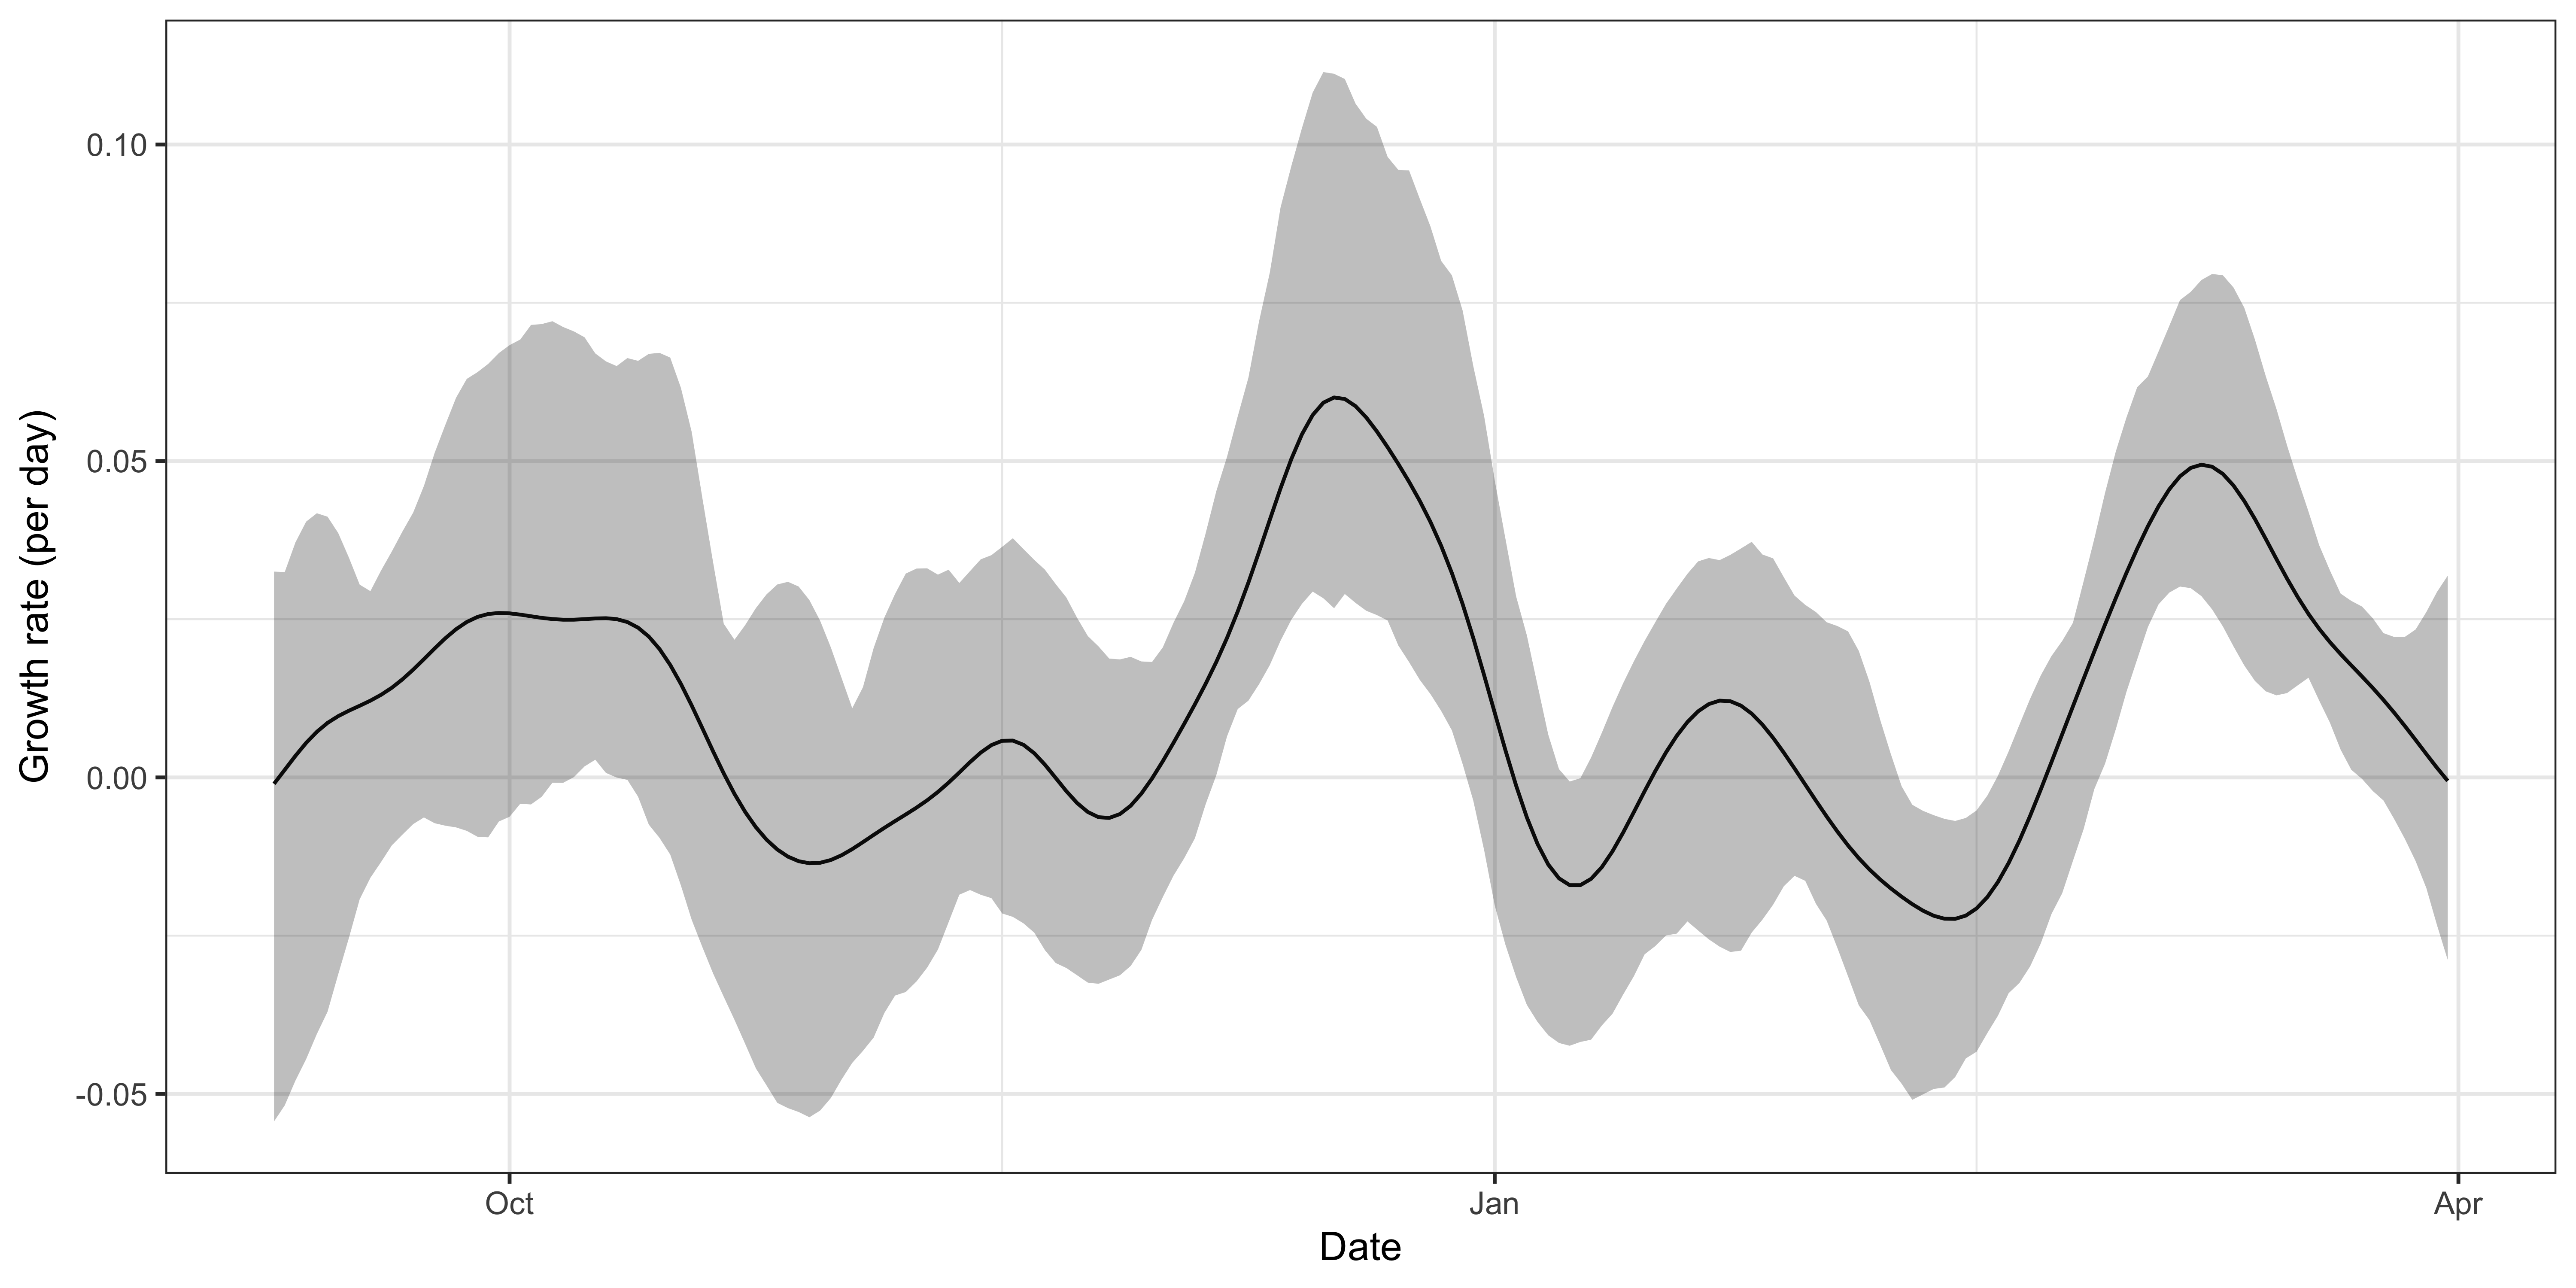

In [7]:
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 600)

plt = ggplot(results %>% filter(variable=="rt")) +
    geom_line(aes(x=date, y=mean)) +
    geom_ribbon(aes(x=date, ymin=lower, ymax=upper), alpha=0.3) +
    theme_bw() +
    xlab("Date") + ylab("Growth rate (per day)")

plt